#### Lab 03: Iris Classification with a Decision Tree

🎓 Lab Goals

This lab aims to:

    1: Introduce Machine Learning in a clear and intuitive way
    2: Show that ML can be implemented with minimal code
    3: Build confidence before moving to more complex models
    4: Reinforce the standard Machine Learning pipeline:

Workflow:

    - Load Data
    - Prepare Features (X) and Target (y)
    - Split Data
    - Train Model
    - Evaluate Model

🧠 Dataset Description:

We use the Iris dataset, containing measurements of 150 flowers from three species:
        
    1: Setosa 2: Versicolor 3: Virginica

Each flower is described by four features:

    1: Sepal length 2: Sepal width 3: Petal length 4: Petal width

🎯 Objective: Predict the flower class using these measurements.

#### 📂 STEP 1 – Import Libraries and Define Constants

📚 Required Libraries

    pandas → Handles tabular data
    seaborn → Data visualization
    matplotlib → Plotting
    train_test_split → Splits data into training and testing sets
    DecisionTreeClassifier → Classification model
    accuracy_score → Measures model performance

⚙️ Defined Constants

    random_state → Ensures reproducibility of results
    test_size → Percentage of data used for testing (30%)
    target → Name of the column to be predicted

Defining constants improves readability, flexibility, and code organization.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2

#### 📂 STEP 2 – Load the Iris Dataset

In this lab, the Iris dataset is loaded from a CSV file, reflecting real-world data handling practices and strengthening practical data science skills.

📌 Dataset Overview

4 numerical columns → Features:

    1: Sepal length 2: Sepal width 3: Petal length 4: Petal width

1 categorical column (class) → Target (y) → Flower class:

    1: Setosa 2: Versicolor 3: Virginica

Each row represents a single flower sample.

🎯 Goal: Predict the flower class based on its measurements.

#### 📊 STEP 3 – Simple Visualization

    Goal: Understand how petal length and petal width relate to each other for different flower classes.

🧠 Code Directions:

    sns.scatterplot(...) → Creates a scatter plot (points on a graph)
    x="petal_length" → Petal length on the horizontal axis
    y="petal_width" → Petal width on the vertical axis
    hue="class" → Colors the points based on flower class

In [11]:

import pandas as pd

column = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

df = pd.read_csv("/content/iris.csv", names=column)

 # Update filename if needed

# Display first few rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


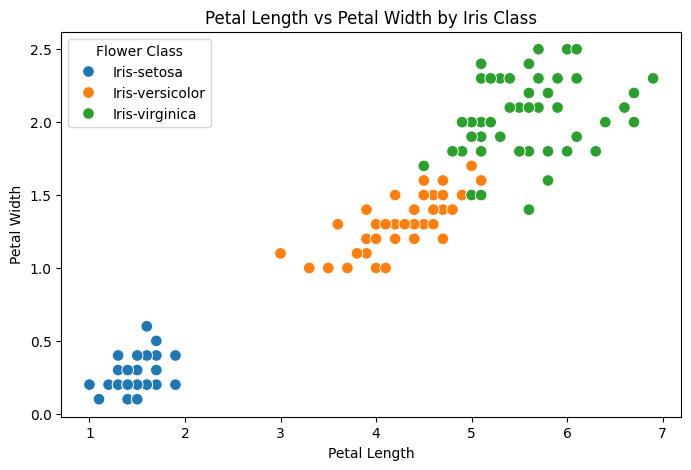

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# The original df has its first row of data interpreted as header.
# We need to rename the columns to what the plot expects.
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="petal_length",
    y="petal_width",
    hue="class",
    s=70
)

plt.title("Petal Length vs Petal Width by Iris Class")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Flower Class")
plt.show()

📌 How to read this graph

Each dot represents one flower

The position of the dot shows:

    1: how long the petal is (x-axis) - how wide the petal is (y-axis)
    2: Different colors represent different flower species

You can clearly see that:

    Setosa forms a separate group - Versicolor and Virginica partially overlap - Some groups are naturally distinguishable

🎯 Why this is important

    The data is not random. Some flower types are easier to separate, and Machine Learning can learn these visible patterns to make accurate predictions.

✅ This visualization provides an intuitive understanding of how the model will later classify flowers.

#### 📊 STEP 4 – Separate Features and Target

In Machine Learning, the dataset is divided into:

    Features (X) → Input variables used by the model - 1: sepal_length 2: sepal_width 3: petal_length 4: petal_width
    Target (y) → Value to be predicted - 1: Setosa 2: Versicolor 3: Virginica

In [25]:
feature = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
target = "class"

x= df.drop(columns = [target])
y = df[target]

✅ Expected Output

X shape: (150, 4) → 150 samples, 4 features

y shape: (150,) → 150 target labels

This confirms that the dataset is correctly prepared for Machine Learning.

#### 📊 STEP 5 – Split the Dataset into Training and Testing Sets

    To evaluate a Machine Learning model correctly, the dataset is divided into:

    Training set → Used to train the model
    Testing set → Used to evaluate performance on unseen data

We use the train_test_split() function from Scikit-learn.

🔗 Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

🧠 Explanation

    test_size: Defines the percentage of data used for testing. Here, 30% is used for testing and 70% for training.

    random_state: Ensures reproducibility. Using the same value always produces the same split.

📐 Check the Shapes

In [35]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (120,), (30, 4), (30,))

✅ Important Notes

    X_train / X_test → DataFrames (features)
    y_train / y_test → Series (targets)

The model will:

    be trained using X_train and y_train
    be evaluated using X_test and y_test

This separation allows us to measure how well the model generalizes to new, unseen data.

#### 🌳 STEP 6 – Train the Decision Tree Model

In this step, we create and train our Machine Learning model using a Decision Tree classifier.

🔗 Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

🧠 Explanation

    DecisionTreeClassifier: A model that learns simple IF–THEN rules to classify data.
    random_state: Ensures reproducibility. Using the same value produces the same trained model each time.
    Other parameters: Any parameters not explicitly set use their default values. These will be explored in future labs.

🔧 The fit() Method

    The fit() method trains the model using:
    X_train → training features and y_train → training labels

When fit() is called, the model:

    1: analyses the training data,
    2: learns patterns and decision rules,
    3: and updates its internal structure based on the data.

✅ After this step, the model is ready to make predictions.

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### ✅ STEP 7 – Evaluate Training Accuracy

This step measures how well the model performs on the training data.

In [47]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training accuracy: {accuracy}")
accuracy * 100

Training accuracy: 1.0


100.0

In [52]:
Y_test_acc = model.predict(Y_train)
testing_accuarcy = accuracy_score(Y_test, Y_test_acc)
testing_accuarcy

1.0

🧠 Explanation

    model → A trained Decision Tree object
    predict() → Method that generates predictions
    accuracy_score() → Function that compares predictions with true labels

📌 Difference Between Object, Method, and Function

    Object → model : Represents the trained Decision Tree
    Method → model.predict() : Belongs to the object and performs an action
    Function → accuracy_score() : Standalone tool that evaluates performance.

📈 Interpretation

    Training accuracy shows how well the model fits the data it was trained on.
    A very high value (close to 100%) is normal for Decision Trees but may indicate memorization.

⚠️ This does not guarantee good performance on unseen data — this will be checked next to assess generalization.

✅ True performance is determined using the test set.

#### 🔍 STEP 8 – Evaluate Test Accuracy

    This step evaluates how well the model performs on unseen data, which reflects its ability to generalize.

Test Accuracy: 97.78%


🧠 Explanation

    The model makes predictions on X_test (data it has never seen before) and compares them with the true labels y_test. The resulting accuracy shows how well the model performs on new data.

🎯 Key Concept – Generalization

    1: A good model performs well not only on training data but also on unseen data.
    2: It is normal for test accuracy to be slightly lower than training accuracy.

⚠️ If training accuracy is much higher than test accuracy, the model may be memorizing the data instead of learning meaningful patterns. This issue is called overfitting and will be discussed in the next lecture.

✅ At this stage, you have observed real-world model performance and the concept of generalization in practice.

#### 🌿 STEP 9 – Visualize the Decision Tree (Optional)

    This step displays the structure of the trained Decision Tree to understand how it makes decisions.

##### Code Directions:
    plot_tree() → Draws the Decision Tree structure
    model → Trained Decision Tree
    feature_names → Shows feature names at each split
    class_names → Displays flower class labels
    filled=True → Colors nodes by predicted class
    rounded=True → Improves readability

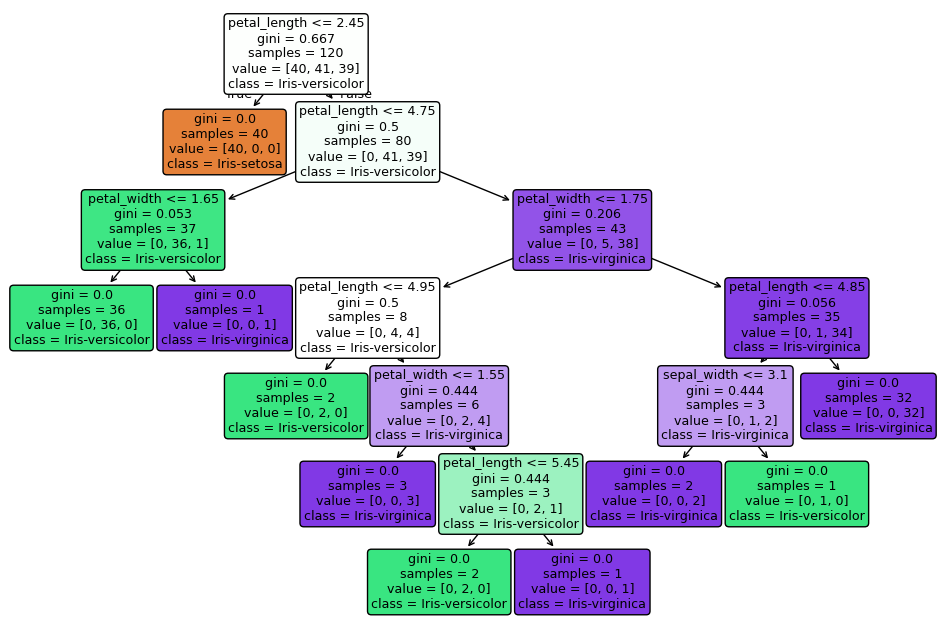

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names= x.columns,
    class_names= model.classes_,
    filled=True,
    rounded=True
)
plt.show()

🔍 How to read the tree

Each node shows:

    1: the feature used for the split
    2: the decision rule (e.g. petal_length ≤ 2.45)
    3: the predicted class
    4: The model applies simple IF–THEN rules from root to leaf to classify each sample.

🎯 This visualization helps connect model accuracy with its internal logic and shows that Decision Trees are interpretable models, not black boxes.

✅ Final Lab Summary

In this lab, you completed a full Machine Learning workflow using a Decision Tree model and the Iris dataset.

You learned how to:

    1: Load data from a CSV file
    2: Separate features (X) and target (y)
    3: Split data into training and testing sets
    4: Train a Decision Tree classifier
    5: Evaluate model performance using accuracy
    6: Understand the concept of generalization
    7: Visualize the Decision Tree structure

📌 Key Concepts Reinforced

    1: Machine Learning Pipeline: Data → Features → Split → Train → Evaluate
    2: Generalization: The model’s ability to perform well on unseen data.
    3: Overfitting (Preview): When a model performs extremely well on training data but poorly on test data.

🎯 Takeaway

    1: Machine Learning follows a clear step-by-step process.
    2: Understanding the workflow is more important than memorizing individual lines of code.
    3: You are now ready to move towards more advanced models and concepts.

✅ End of Lab 03